# Obtaining Data + Scrubbing Data

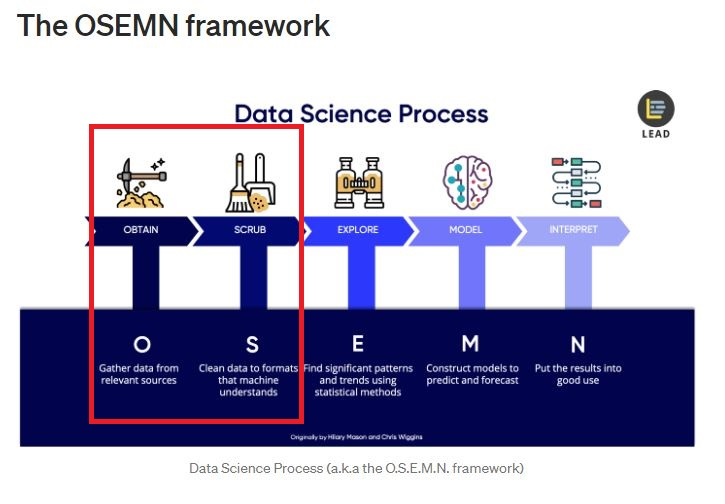

__Source__: https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492

#### Website: https://www.kaggle.com/blastchar/telco-customer-churn
#### File: WA_Fn-UseC_-Telco-Customer-Churn.csv

## Library Imports

In [47]:
import pandas as pd

## Creating Pandas Dataframe using .read_csv method

In [48]:
df_churndata = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# pd.set_option("max_rows", None)
# pd.set_option("max_columns", None)
df_churndata.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### Info about the dataframe
#### We see 3 types of data: float64, int64, object

In [49]:
df_churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Checking for nulls/NaNs
### We see from below that there are no null values or NaNs. The data was cleaned beforehand.

In [50]:
# Using .isna()
df_churndata.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [51]:
# We have empty series using .isnull()
df_churndata.isnull().any()[lambda x: x]

Series([], dtype: bool)

In [52]:
df_churndata.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

## Changes to the dataframe
#### 1) CHURN --> 0/1 Values
#### 2) Dummy values for redundant "no internet service', then they can be turned to binary columns --> 0/1 Values
        MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
        StreamingTV, StreamingMovies
#### 3) Don't want 2 indexes so I dropped 'Unnamed' column
#### 4) Binary columns --> 0/1 
        gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling
#### 5) Scaling data in columns - I've decided to scale this in exploration phase with train/test split where i can call minmax scalar
        tenure, MonthlyCharges, TotalCharges
#### 6) Simplify PaymentMethod and Contract Types

In [53]:
# 1) and 4) Change binary categorical values to 0/1

binary_list = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# for column in binary_list:
#     df_churndata[column] = df_churndata[column].map({'Yes': 1, 'No':0})


df_churndata['Churn'] = df_churndata['Churn'].map({'Yes': 1, 'No':0})
df_churndata['gender'] = df_churndata['gender'].map({'Female': 0, 'Male':1})
df_churndata['Partner'] = df_churndata['Partner'].map({'Yes': 1, 'No':0})
df_churndata['Dependents'] = df_churndata['Dependents'].map({'Yes': 1, 'No':0})
df_churndata['PhoneService'] = df_churndata['PhoneService'].map({'Yes': 1, 'No':0})
df_churndata['PaperlessBilling'] = df_churndata['PaperlessBilling'].map({'Yes': 1, 'No':0})

df_churndata.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
# 2) Dummy values for redundant "no internet service', then they can be turned to binary columns

### Changing "No Phone Service" to "No"
### InternetService im changing to simple yes/no

df_churndata['MultipleLines']    = df_churndata['MultipleLines'].replace(['No phone service'], 'No')
df_churndata['InternetService']  = df_churndata['InternetService'].replace(['No phone service'], 'No')
df_churndata['InternetService']  = df_churndata['InternetService'].replace(['DSL'], 'Yes')
df_churndata['InternetService']  = df_churndata['InternetService'].replace(['Fiber optic'], 'Yes')
df_churndata['OnlineSecurity']   = df_churndata['OnlineSecurity'].replace(['No phone service','No internet Service'], 'No')
df_churndata['OnlineBackup']     = df_churndata['OnlineBackup'].replace(['No phone service','No internet Service'], 'No')
df_churndata['DeviceProtection'] = df_churndata['DeviceProtection'].replace(['No phone service','No internet Service'], 'No')
df_churndata['TechSupport']      = df_churndata['TechSupport'].replace(['No phone service','No internet Service'], 'No')
df_churndata['StreamingTV']      = df_churndata['StreamingTV'].replace(['No phone service','No internet Service'], 'No')
df_churndata['StreamingMovies']  = df_churndata['StreamingMovies'].replace(['No phone service','No internet Service'], 'No')


### Converting them to binary values
df_churndata['MultipleLines']    = df_churndata['MultipleLines'].map({'Yes': 1, 'No':0})
df_churndata['InternetService']  = df_churndata['InternetService'].map({'Yes': 1, 'No':0})
df_churndata['OnlineSecurity']   = df_churndata['OnlineSecurity'].map({'Yes': 1, 'No':0})
df_churndata['OnlineBackup']     = df_churndata['OnlineBackup'].map({'Yes': 1, 'No':0})
df_churndata['DeviceProtection'] = df_churndata['DeviceProtection'].map({'Yes': 1, 'No':0})
df_churndata['TechSupport']      = df_churndata['TechSupport'].map({'Yes': 1, 'No':0})
df_churndata['StreamingTV']      = df_churndata['StreamingTV'].map({'Yes': 1, 'No':0})
df_churndata['StreamingMovies']  = df_churndata['StreamingMovies'].map({'Yes': 1, 'No':0})


# df['first_set'] = df['first_set'].replace(['Blue'],'Green')
# df_churndata.head()

In [55]:
print(df_churndata['PaymentMethod'].unique())
print(df_churndata['Contract'].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Month-to-month' 'One year' 'Two year']


In [56]:
#Here we are going to make the changes to Contract and Payment method columns

#Contract
df_churndata['Contract'] = df_churndata['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

#PaymentMethod
df_churndata['PaymentMethod'] = df_churndata['PaymentMethod'].map({
    'Electronic check' : 0,
    'Bank transfer (automatic)': 0,
    'Credit card (automatic)': 0,
    'Mailed check': 1})

#### I want to normalize the following: 1) Tenure  2) Monthly Charges 3) Total Charges

In [57]:
# I kept getting errors when trying to turn the column "TotalCharges" from non-null object to float
# I figured that the issue is because of row 488 per the errors. 
# Value for TotalCharges is blank for row 488
# I also considered using either mean, median, or mode
# But that was out the window because I have to make it float first and then I can run the methods for mean/median/mode

In [58]:
listblankindices = df_churndata[(df_churndata['TotalCharges'] == ' ')].index
listblankindices

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [59]:
df_churndata.drop(listblankindices, inplace=True)

In [60]:
df_churndata.reset_index(drop=True, inplace=True)
df_churndata.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                1             0.0  ...   
1             1              0                1             1.0  ...   
2             1              0                1             1.0  ...   
3             0              0                1             1.0  ...   
4             1              0                1             0.0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0         0   
1               1.0          0.0          0.0              0.0         1   
2               0.0          0.0          0.0              0.0         0   
3               1.0          1.0          0.0              0.0         1   
4               0.0          0.0          0.0              0.0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0                 1              0           29.85         29.85     0  
1                 0              1           56.95        1889.5     0  
2                 1              1           53.85        108.15     1  
3                 0              0           42.30       1840.75     0  
4                 1              0           70.70        151.65     1  

[5 rows x 21 columns]

In [61]:
df_churndata['TotalCharges'] = df_churndata['TotalCharges'].astype(float)

In [62]:
df_churndata['TotalCharges'].mean()

2283.300440841866

In [63]:
#NOW I can normalize everything!
#FORMULA IS:
# (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())


df_churndata['TotalCharges'] = (df_churndata['TotalCharges'] - df_churndata['TotalCharges'].min()) / (df_churndata['TotalCharges'].max() - df_churndata['TotalCharges'].min())
df_churndata['MonthlyCharges'] = (df_churndata['MonthlyCharges'] - df_churndata['MonthlyCharges'].min()) / (df_churndata['MonthlyCharges'].max() - df_churndata['MonthlyCharges'].min())
df_churndata['tenure'] = (df_churndata['tenure'] - df_churndata['tenure'].min()) / (df_churndata['tenure'].max() - df_churndata['tenure'].min())

In [64]:
df_churndata.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [65]:
df_churndata.dropna(inplace=True)
df_churndata.reset_index()
df_churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 7031
Data columns (total 21 columns):
customerID          5512 non-null object
gender              5512 non-null int64
SeniorCitizen       5512 non-null int64
Partner             5512 non-null int64
Dependents          5512 non-null int64
tenure              5512 non-null float64
PhoneService        5512 non-null int64
MultipleLines       5512 non-null int64
InternetService     5512 non-null int64
OnlineSecurity      5512 non-null float64
OnlineBackup        5512 non-null float64
DeviceProtection    5512 non-null float64
TechSupport         5512 non-null float64
StreamingTV         5512 non-null float64
StreamingMovies     5512 non-null float64
Contract            5512 non-null int64
PaperlessBilling    5512 non-null int64
PaymentMethod       5512 non-null int64
MonthlyCharges      5512 non-null float64
TotalCharges        5512 non-null float64
Churn               5512 non-null int64
dtypes: float64(9), int64(11), obj

In [66]:
df_churndata.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
#Saving to new .csv file
df_churndata.to_csv('TelcoCustomerChurn[MODIFIED].csv')

## So far so good. The data looks clean. There are no NaNs and isna() returned zeros. Will proceed to EDA.
    We will be using "TelcoCustomerChurn[MODIFIED].csv" moving forward